In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import scipy.special
import matplotlib.pyplot as plt
plt.style.use('default')
from pyfermions import *

# Entropy

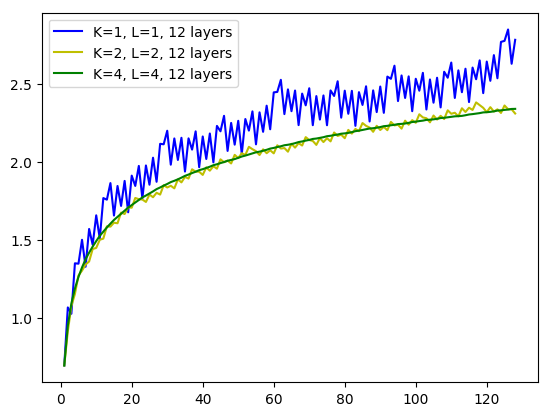

In [12]:
def h(p):
    p = np.maximum(0, np.minimum(1, p))
    return scipy.special.entr(p) + scipy.special.entr(1 - p)

def entropy(cov):
    n = np.linalg.eigvalsh(cov)
    return np.sum(h(n))

def entropy_plot(K, L, M=12, R_max=128, **kwargs):
    mera = mera1d.selesnick(K, L)
    cov = mera.covariance(R_max, M)
    R = np.arange(1, R_max+1)
    S = [entropy(cov[:R,:R]) for R in range(1, R_max+1)]
    plt.plot(R, S, **kwargs, label=f'K={K}, L={L}, {M} layers')

entropy_plot(1, 1, color='b')
entropy_plot(2, 2, color='y')
entropy_plot(4, 4, color='g')
plt.legend()
plt.show()